<div align="center"><h3>HW3, Question 3</h3></div>
<div align="center"><h5>Mohammadreza Ghofrani, 400131076</h5></div>

In [1]:
import sklearn
import numpy as np
import pandas as pd
from sklearn import *
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
dataset = pd.read_csv('data/P3/BOM.csv')

Removing those samples in which target attribute is unassigned

In [3]:
dataset = dataset[dataset['RainTomorrow'].notna()]

Filling Null columns in samples with mode or median

In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['month'] = dataset.apply(lambda row: row.Date.month, axis = 1)
f = lambda x: x.median() if np.issubdtype(x.dtype, np.number) else x.mode().iloc[0]
dataset = dataset.fillna(dataset.groupby('month').transform(f))

Shuffling given dataset

In [5]:
dataset = dataset.sample(frac=1)

Converting nominal values to numeric values

In [6]:
dataset['Location'] = pd.factorize(dataset['Location'], sort=True)[0]
dataset['WindGustDir'] = pd.factorize(dataset['WindGustDir'], sort=True)[0]
dataset['WindDir9am'] = pd.factorize(dataset['WindDir9am'], sort=True)[0]
dataset['WindDir3pm'] = pd.factorize(dataset['WindDir3pm'], sort=True)[0]
dataset['RainToday'] = pd.factorize(dataset['RainToday'], sort=True)[0]

Converting from object to float so that features be calculated while calculating the correlation matrix

In [7]:
dataset['MinTemp'] = dataset['MinTemp'].astype(float)
dataset['MaxTemp'] = dataset['MaxTemp'].astype(float)
dataset['Rainfall'] = dataset['Rainfall'].astype(float)
dataset['Evaporation'] = dataset['Evaporation'].astype(float)
dataset['Sunshine'] = dataset['Sunshine'].astype(float)
dataset['Pressure9am'] = dataset['Pressure9am'].astype(float)
dataset['Pressure3pm'] = dataset['Pressure3pm'].astype(float)
dataset['Temp9am'] = dataset['Temp9am'].astype(float)
dataset['Temp3pm'] = dataset['Temp3pm'].astype(float)

Partitioning dataset into train, validtion and test datasets

In [13]:
X , y = dataset.loc[:, ~dataset.columns.isin(['RainTomorrow', 'Date', 'Location'])], dataset['RainTomorrow']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25)

# Part A

In [14]:
X_train.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,month
MinTemp,1.000000,0.735644,0.098858,0.475590,0.146269,-0.143076,0.172662,-0.018335,-0.152982,0.173053,...,-0.233706,0.001475,-0.443661,-0.451899,0.057580,-0.019256,0.899114,0.704719,0.052183,-0.205032
MaxTemp,0.735644,1.000000,-0.075432,0.568441,0.430554,-0.204345,0.069576,-0.196964,-0.174943,0.012937,...,-0.500651,-0.503000,-0.333728,-0.420209,-0.225300,-0.245828,0.882539,0.971165,-0.228794,-0.166062
Rainfall,0.098858,-0.075432,1.000000,-0.032927,-0.163142,0.039279,0.123487,0.082419,0.043707,0.084215,...,0.216860,0.245371,-0.155223,-0.117099,0.168043,0.142724,0.008952,-0.077118,0.492726,-0.028287
Evaporation,0.475590,0.568441,-0.032927,1.000000,0.389116,-0.069318,0.189571,-0.060178,-0.050726,0.167595,...,-0.430755,-0.330632,-0.300483,-0.316358,-0.159831,-0.188085,0.543483,0.550222,-0.145300,-0.030424
Sunshine,0.146269,0.430554,-0.163142,0.389116,1.000000,-0.049684,0.021799,-0.059652,-0.030445,0.017389,...,-0.383703,-0.459920,-0.062124,-0.104183,-0.490305,-0.529452,0.310077,0.439061,-0.232531,0.026498
WindGustDir,-0.143076,-0.204345,0.039279,-0.069318,-0.049684,1.000000,0.139434,0.370960,0.579144,0.025775,...,0.049554,0.044599,-0.122182,-0.035465,0.058004,0.056540,-0.176151,-0.215959,0.119989,0.059671
WindGustSpeed,0.172662,0.069576,0.123487,0.189571,0.021799,0.139434,1.000000,0.060691,0.139525,0.581235,...,-0.214646,-0.031152,-0.432237,-0.391688,0.039418,0.060703,0.147549,0.035339,0.143167,0.063410
WindDir9am,-0.018335,-0.196964,0.082419,-0.060178,-0.059652,0.370960,0.060691,1.000000,0.299401,0.063996,...,0.102150,0.147115,-0.049102,0.039764,0.086728,0.053125,-0.105615,-0.202080,0.162613,0.009210
WindDir3pm,-0.152982,-0.174943,0.043707,-0.050726,-0.030445,0.579144,0.139525,0.299401,1.000000,0.048989,...,0.021515,-0.013208,-0.128320,-0.035033,0.043209,0.049373,-0.169230,-0.184157,0.120145,0.042709
WindSpeed9am,0.173053,0.012937,0.084215,0.167595,0.017389,0.025775,0.581235,0.063996,0.048989,1.000000,...,-0.269075,-0.030989,-0.218053,-0.168859,0.004136,0.020965,0.126276,0.003755,0.101046,0.051036


In [15]:
for row_name, row  in X_train.corr().iterrows():
    for column_name, value in row.iteritems():
        if row_name == column_name:
            continue
        if np.abs(value) > 0.95:
            print(row_name, column_name)

MaxTemp Temp3pm
Pressure9am Pressure3pm
Pressure3pm Pressure9am
Temp3pm MaxTemp


In [17]:
X , y = dataset.loc[:, ~dataset.columns.isin(['RainTomorrow', 'Date', 'Location', 'MaxTemp', 'Pressure9am'])], dataset['RainTomorrow']
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25)

# Part B

In [18]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
sfs = sklearn.feature_selection.SequentialFeatureSelector(knn, n_features_to_select=10)
sfs.fit(X_train, y_train)
selected_features = X_train.columns[sfs.get_support()]

In [19]:
selected_features

Index(['MinTemp', 'Rainfall', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir3pm', 'WindSpeed3pm', 'Humidity3pm', 'Pressure3pm', 'Temp3pm'],
      dtype='object')

# Part C

Finding Best value of `K` using train and validation datasets.

In [20]:
k_values = list(range(1, 30))
accuracy = list()
for k in k_values:
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[selected_features], y_train)
    y_predicted = knn.predict(X_val[selected_features])
    accuracy.append(metrics.accuracy_score(y_val, y_predicted))

Ploting the accuracy based on `k`.

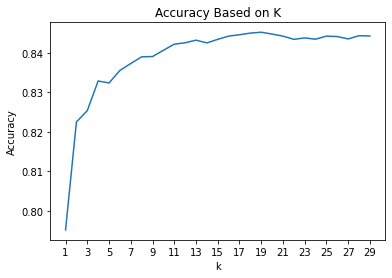

In [ ]:
plt.plot(k_values, accuracy)
plt.xlabel('k') 
plt.ylabel('Accuracy')
plt.title("Accuracy Based on K")
plt.xticks(range(1, 30, 2))
plt.show()

Based on best value for k determined from previous cell, predict test dataset labels.

In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train[selected_features], y_train)
y_predicted = knn.predict(X_test[selected_features])
accuracy = metrics.accuracy_score(y_test, y_predicted)
print("Accuracy on the Test dataset:", accuracy)

Accuracy on the Test dataset: 0.8435950631175498


# Part C

In [52]:
Rasht_Monday_weather = pd.DataFrame({
    'MinTemp': [3], 
    'Rainfall': [22.6], 
    'Sunshine': [0],
    'WindGustSpeed': [5],
    'WindGustDir': [10.75],
    'WindDir3pm': [4],
    'WindSpeed3pm': [7],
    'Humidity3pm': [100],
    'Pressure3pm': [1023],
    'Temp3pm': [3]
    })

In [55]:
prediction = knn.predict(Rasht_Monday_weather[selected_features])
print(prediction[0])

Yes
